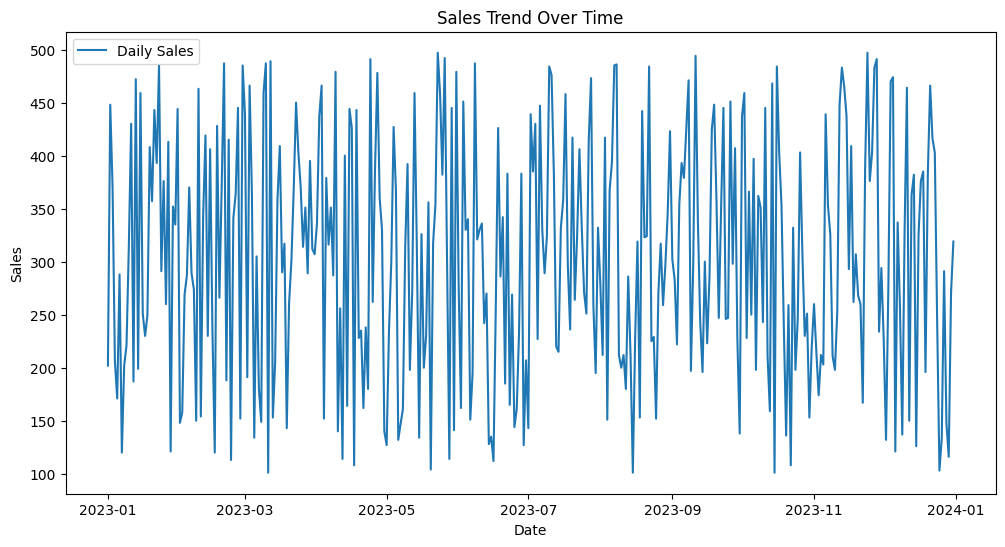

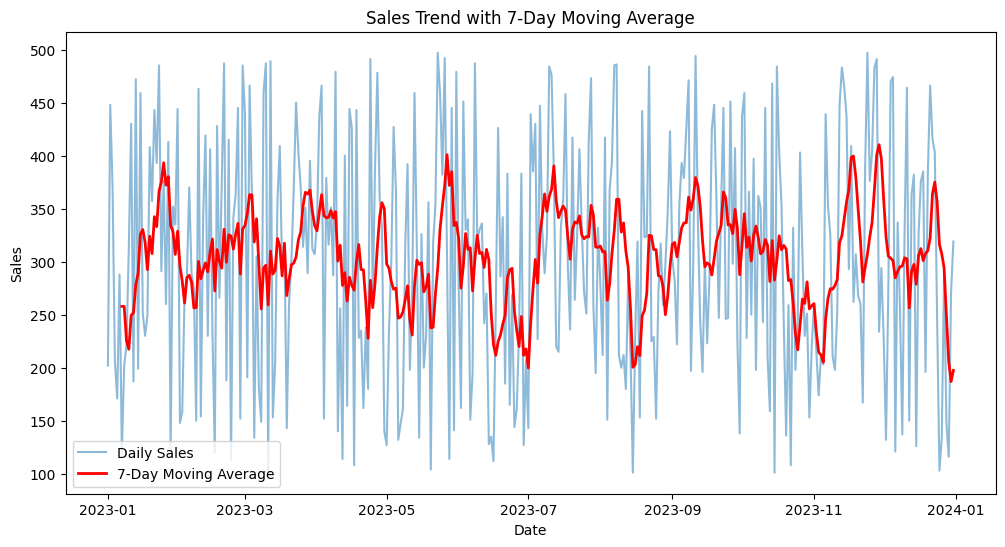

Test Forecast RMSE: 118.52
Test Forecast MAPE: 48.79%


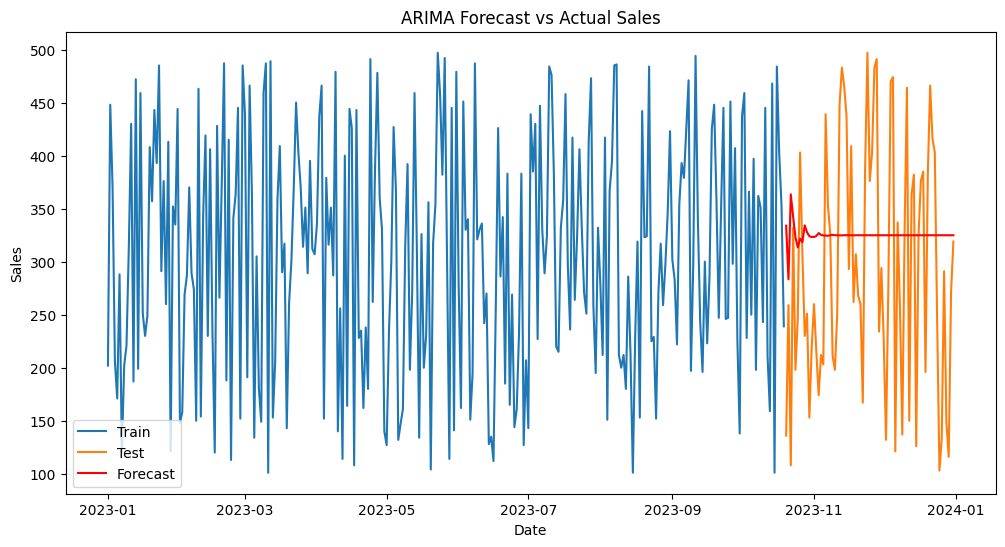

Future 30-Day Sales Forecast:
            Forecasted_Sales
Date                        
2024-01-01        333.916552
2024-01-02        283.408412
2024-01-03        363.493227
2024-01-04        342.462483
2024-01-05        322.934828
2024-01-06        313.471782
2024-01-07        321.751182
2024-01-08        318.353830
2024-01-09        334.236477
2024-01-10        327.674678
2024-01-11        324.025533
2024-01-12        323.229640
2024-01-13        323.246703
2024-01-14        324.237764
2024-01-15        326.944593
2024-01-16        325.240579
2024-01-17        324.790693
2024-01-18        324.542279
2024-01-19        324.415165
2024-01-20        324.936838
2024-01-21        325.297727
2024-01-22        324.943489
2024-01-23        324.904173
2024-01-24        324.796687
2024-01-25        324.792683
2024-01-26        324.941416
2024-01-27        324.970471
2024-01-28        324.911887
2024-01-29        324.904585
2024-01-30        324.870684


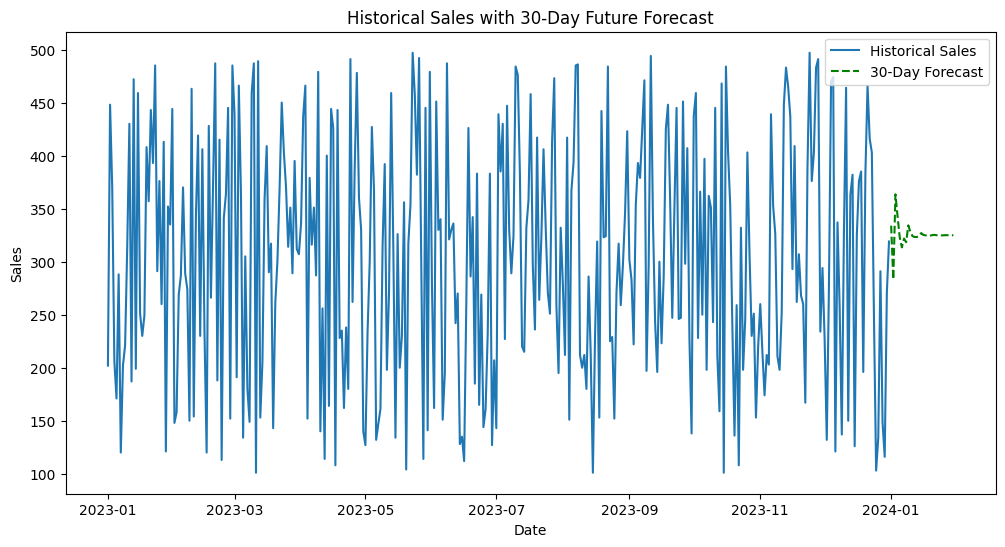

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# -------------------------
# 1. Data Loading & Preprocessing
# -------------------------
# Load the dataset (adjust the file path as needed)
df = pd.read_csv('E:\\New folder\\salesdata.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('D')  # Ensure the index has daily frequency

# -------------------------
# 2. Visualizing Sales Trends Over Time
# -------------------------
# Plot the daily sales trend
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Daily Sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Compute and plot a 7-day moving average for smoothing
df['Sales_MA7'] = df['Sales'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Daily Sales', alpha=0.5)
plt.plot(df['Sales_MA7'], label='7-Day Moving Average', color='red', linewidth=2)
plt.title('Sales Trend with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# -------------------------
# 3. ARIMA Forecasting
# -------------------------
# Split the dataset into training (80%) and testing (20%) sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit an ARIMA model on the training data
# Here we use ARIMA(5,1,0) as an example; you might need to tune the parameters based on your data.
model = ARIMA(train['Sales'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast for the test period
start = test.index[0]
end = test.index[-1]
forecast = model_fit.predict(start=start, end=end, typ='levels')

# Evaluate the forecast accuracy using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], forecast))
mape = mean_absolute_percentage_error(test['Sales'], forecast)
print("Test Forecast RMSE: {:.2f}".format(rmse))
print("Test Forecast MAPE: {:.2%}".format(mape))

# Plot the actual vs. forecasted sales for the test period
plt.figure(figsize=(12, 6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Forecast future sales for the next 30 days beyond the dataset
future_forecast = model_fit.forecast(steps=30)
future_forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_forecast_df = pd.DataFrame({'Date': future_forecast_dates, 'Forecasted_Sales': future_forecast})
future_forecast_df.set_index('Date', inplace=True)

print("Future 30-Day Sales Forecast:")
print(future_forecast_df)

# Optionally, plot the future forecast alongside historical sales
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Historical Sales')
plt.plot(future_forecast_df, label='30-Day Forecast', color='green', linestyle='--')
plt.title('Historical Sales with 30-Day Future Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             500 non-null    int64 
 1   Gender          500 non-null    object
 2   Cholesterol     500 non-null    int64 
 3   Blood Pressure  500 non-null    object
 4   Heart Disease   500 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 19.7+ KB
Initial Dataset Info:
 None

Missing Values per Column:
 Age               0
Gender            0
Cholesterol       0
Blood Pressure    0
Heart Disease     0
dtype: int64

Unique values in 'Heart Disease': [1 0]

Confusion Matrix:
 [[26 21]
 [30 23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.55      0.50        47
           1       0.52      0.43      0.47        53

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49 

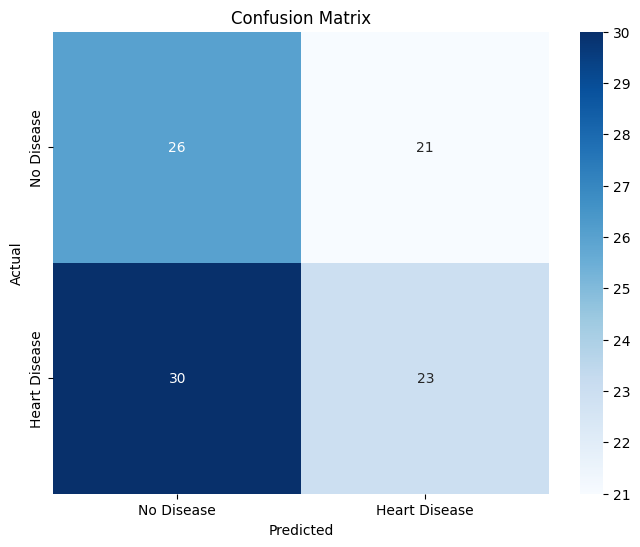

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load Dataset (Ensure correct file path)
file_path = r"E:\New folder\heart_disease.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

df = pd.read_csv(file_path)

# Display initial dataset info
print("Initial Dataset Info:\n", df.info())

# Check for missing values
print("\nMissing Values per Column:\n", df.isnull().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Convert categorical variables (if present)
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Ensure 'Heart Disease' column exists and is mapped properly
if 'Heart Disease' in df.columns:
    unique_values = df['Heart Disease'].unique()
    print("\nUnique values in 'Heart Disease':", unique_values)

    # Check for common variations and standardize
    df['Heart Disease'] = df['Heart Disease'].replace({'No': 0, 'Yes': 1, 'N': 0, 'Y': 1})
    
    # Convert to numeric
    df['Heart Disease'] = pd.to_numeric(df['Heart Disease'], errors='coerce')

    # Fill missing target values with 0 (Assuming missing data means 'No Disease')
    if df['Heart Disease'].isnull().sum() > 0:
        print("⚠ Warning: 'Heart Disease' contains NaN values. Filling missing values with 0.")
        df['Heart Disease'].fillna(0, inplace=True)

# If the dataset is empty, raise an error
if df.empty:
    raise ValueError("Dataset is empty after processing 'Heart Disease'. Check data source.")

# Process 'Blood Pressure' column if it exists
if 'Blood Pressure' in df.columns:
    bp_split = df['Blood Pressure'].astype(str).str.split('/', expand=True)
    if bp_split.shape[1] == 2:
        df['Systolic BP'] = pd.to_numeric(bp_split[0].str.strip(), errors='coerce')
        df['Diastolic BP'] = pd.to_numeric(bp_split[1].str.strip(), errors='coerce')
        df.drop(columns=['Blood Pressure'], inplace=True)

# List of numeric columns (Ensure existence before imputation)
numeric_cols = ['Age', 'Cholesterol', 'Systolic BP', 'Diastolic BP']
numeric_cols = [col for col in numeric_cols if col in df.columns]

if not numeric_cols:
    raise KeyError("No numeric columns found for imputation.")

# Handle missing values using imputation (mean for numeric columns)
imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Ensure required columns exist
expected_columns = ['Age', 'Gender', 'Cholesterol', 'Systolic BP', 'Diastolic BP', 'Heart Disease']
missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"Missing expected columns: {missing_columns}")

# Feature Selection
X = df[['Age', 'Gender', 'Cholesterol', 'Systolic BP', 'Diastolic BP']]
y = df['Heart Disease']

# 🚀 Ensure y has no NaN values
if y.isnull().sum() > 0:
    raise ValueError("y (target variable) still contains NaN values after preprocessing.")

# Data Scaling (Exclude 'Gender' since it's categorical)
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['Age', 'Cholesterol', 'Systolic BP', 'Diastolic BP']] = scaler.fit_transform(
    X[['Age', 'Cholesterol', 'Systolic BP', 'Diastolic BP']]
)

# Split Data
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Evaluation Results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
